# Keldy: 1-Band Impurity: Benchmarks

## Imports & Setup Properties

In [1]:
import os
import sys
import glob
import copy
import itertools

import h5py

import math
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import scipy.integrate

import mpi4py
import mpi4py.MPI

import time

### Plotting

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.print_figure_kwargs
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

In [3]:
#Plotting Options
markslist='o^v<>dhps*HD'
cmap = plt.get_cmap('plasma')
color_list_limit = 2

def f_colorlist(i, offset = 0, cycle = color_list_limit):
    return cmap(float((i+offset)%cycle) / cycle)

def f_markslist(i, offset = 0, cycle = color_list_limit):
    return markslist[((i+offset)%cycle)]

### Keldy Import

In [4]:
from pytriqs.gf import *
from pytriqs.plot.mpl_interface import oplot,plt

import keldy.impurity_oneband_module as k_imp

## Model g0

In [25]:
anderson_param_A1 = {
    "beta": 10000.0, 
    "bias_V" : 0.0,
    "eps_d": -0.0,
    "Gamma": 0.25,
    "time_max": 100.0,
    "alpha": -0.0,
    "nr_time_points_gf": int(2*5000-1),#int(1e6),
    "bath_type": "semicircle"
}

anderson_param_A2 = {
    "beta": 10000.0, 
    "bias_V" : 0.0,
    "eps_d": -0.5,
    "Gamma": 0.25,
    "time_max": 100.0,
    "alpha": -0.0,
    "nr_time_points_gf": int(2*5000-1),#int(1e6),
    "bath_type": "semicircle"
}

## Measurement (Marjan)

In [26]:
N_calculated = [10560, 107616, 1090944]

In [27]:
np.diff(N_calculated)

array([ 97056, 983328])

In [28]:
for order in range(1,10):
    t0 = time.time()
    computer = k_imp.ComputeChargeQ(order, 10.0, anderson_param_A1, int(1e6))
    N_tot = 0
    result = []
    N_vec = []

    currN = 0
    for steps in [10560, 97056, 983328]:
        computer.run(steps)
        currN += steps
        result.append((-1j)*(-1j)**order * computer.reduce_result() )
        N_vec.append(currN)
        
    print("Order :", order)
    print(N_vec)
    print(np.round(result,6))
    print("Time needed :", time.time() - t0)

('Order :', 1)
[10560, 107616, 1090944]
[0.377877-0.j 0.377878-0.j 0.377879-0.j]
('Time needed :', 11.770185947418213)
('Order :', 2)
[10560, 107616, 1090944]
[0.28505 -0.j 0.285023-0.j 0.285007-0.j]
('Time needed :', 12.430059909820557)
('Order :', 3)
[10560, 107616, 1090944]
[-0.026345-0.j -0.026303-0.j -0.026285-0.j]
('Time needed :', 13.879398107528687)
('Order :', 4)
[10560, 107616, 1090944]
[-0.372804+0.j -0.373379+0.j -0.373408+0.j]
('Time needed :', 16.58544898033142)
('Order :', 5)
[10560, 107616, 1090944]
[-0.377891+0.j -0.378812+0.j -0.378212+0.j]
('Time needed :', 20.892292022705078)
('Order :', 6)
[10560, 107616, 1090944]
[0.161092-0.j 0.157309-0.j 0.158336-0.j]
('Time needed :', 29.00681495666504)
('Order :', 7)
[10560, 107616, 1090944]
[0.702985-0.j 0.699459-0.j 0.700227-0.j]
('Time needed :', 43.45574593544006)
('Order :', 8)
[10560, 107616, 1090944]
[0.332442-0.j 0.324402-0.j 0.325466-0.j]
('Time needed :', 64.85194706916809)
('Order :', 9)
[10560, 107616, 1090944]
[-0

## Convergence Plot

In [17]:
data = {}

In [18]:
for order in [2, 4, 8]:
    print(order)
    t0 = time.time()
    computer = k_imp.ComputeChargeQ(order, 10.0, anderson_param_A2, int(1e6))
    N_tot = 0
    result = []
    N_vec = []

    currN = 0
    for steps in [1000 * i for i in range(1, 101)]:
        computer.run(steps)
        currN += steps
        result.append((-1j)*(-1j)**order * computer.reduce_result() )
        N_vec.append(currN)
        
    data[order] = (N_vec, result)
        
    print("Order :", order)
    print("Time needed :", time.time() - t0)

2
('Order :', 2)
('Time needed :', 63.455442905426025)
4
('Order :', 4)
('Time needed :', 85.59129214286804)
8


KeyboardInterrupt: 

In [19]:
# print(data)

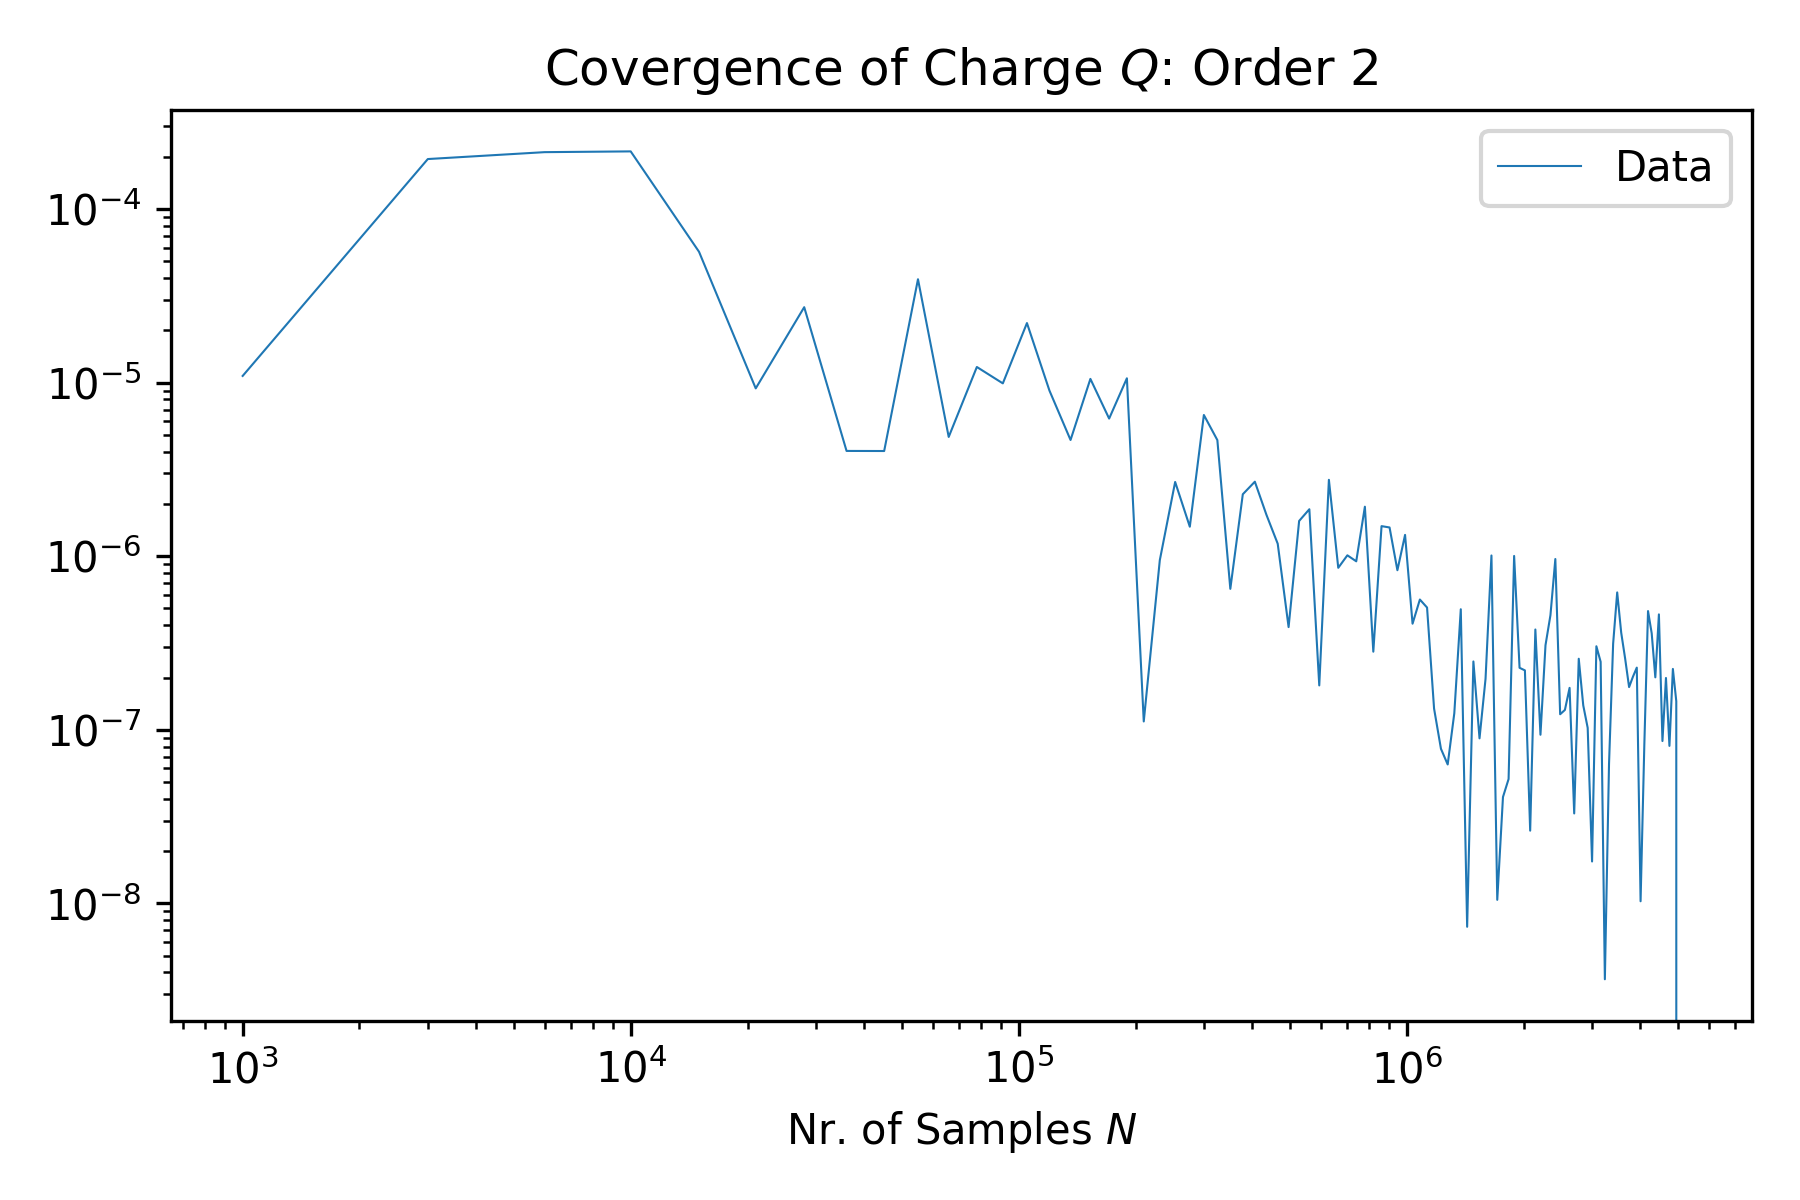

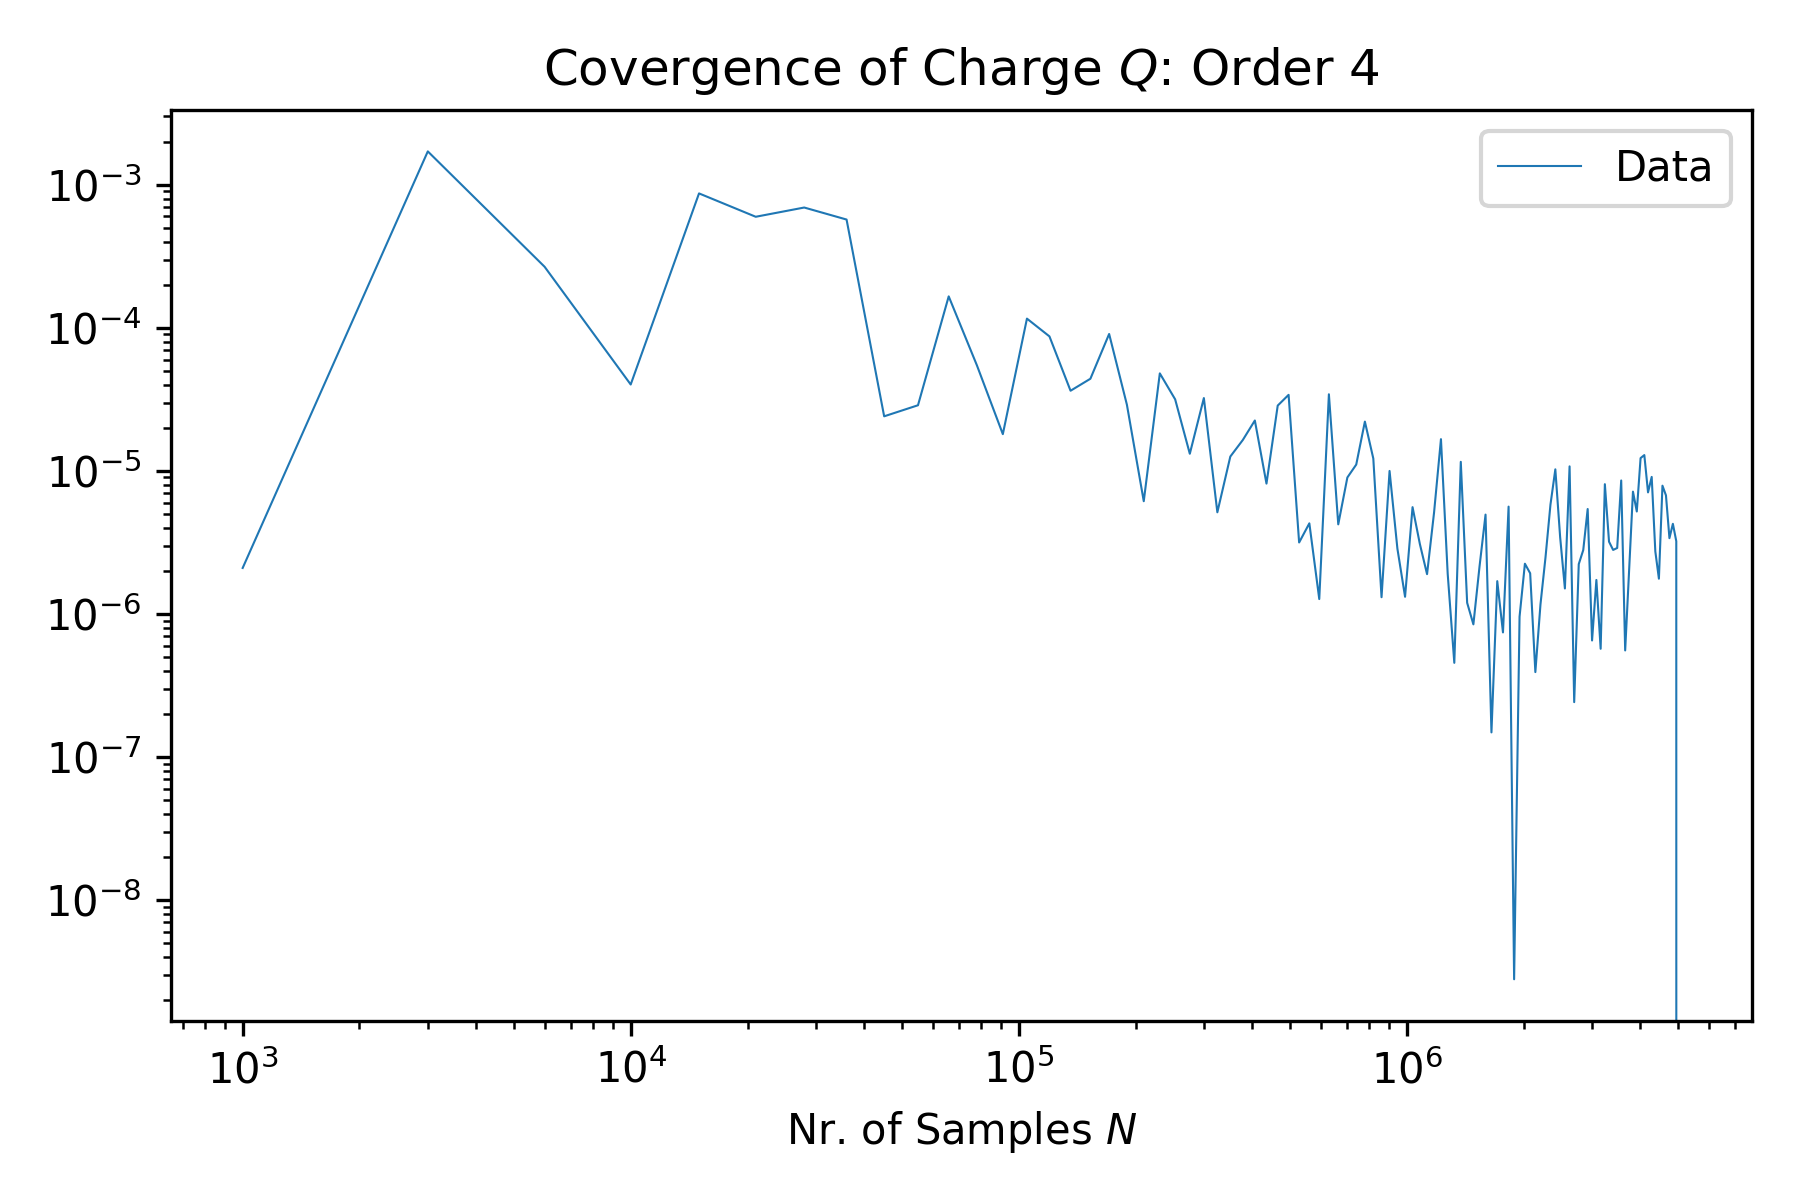

In [20]:
for order_i in data.keys():
    fig = plt.figure(dpi=300)
    ax0 = plt.axes()

    result = data[order_i][1]
    ax0.plot(data[order_i][0], np.abs(np.array(result).real - np.array(result).real[-1] ), linewidth=0.5, label="Data")

    logscale_x = np.array([10**3, 10**7])
    logscale_y1 = np.array([10**-3, 10**-7])


    # ax0.plot(logscale_x, logscale_y1 * 100, c='red', label="$N^{-1}$")
    # ax0.plot(logscale_x, np.sqrt(logscale_y1)  *3, c='k', label="$N^{-1/2}$")

    ax0.set_xscale('log')
    ax0.set_yscale('log')

    ax0.set_title(r"Covergence of Charge $Q$: Order {}".format(order_i))
    ax0.set_xlabel("Nr. of Samples $N$")

    ax0.legend()
    plt.tight_layout()
    plt.savefig("converegence_A2_order{}.pdf".format(order_i), dpi=600)
    plt.show()
    plt.close()

In [43]:
(-1j)*(-1j)**order * computer.reduce_result() 

(0.2850061020283006-8.6582114759719e-13j)

In [44]:
computer.reduce_nr_points_run() 

500000

In [45]:
result_1 = 0.37803751573267336
result_2 = 0.285251918462279

## Plot Integrand

In [9]:
t_max = 10.0

In [10]:
computer = k_imp.ComputeChargeQ(1, 10.0, anderson_param_A2, int(1e6))

### Order 1

In [13]:
t = np.linspace(0.0,10.0,251)
t_list = [list([t0]) for t0 in t]
W_order1 = np.array(map(computer.integrand, t_list))

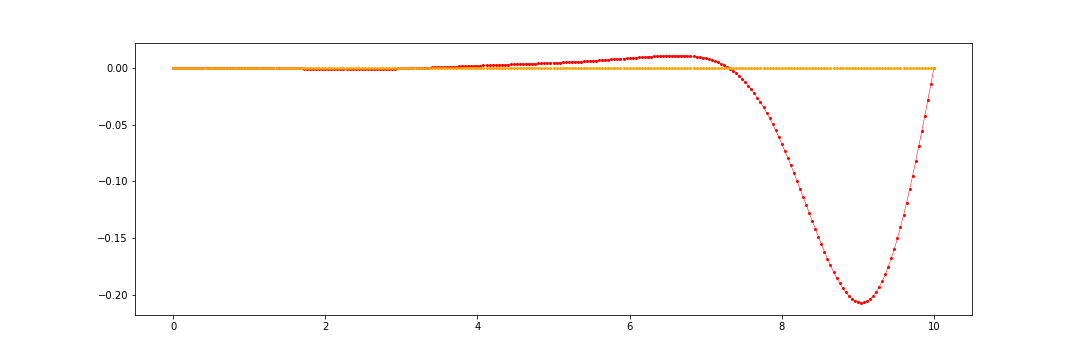

In [14]:
fig = plt.figure(figsize=(15,5))
ax0 = plt.subplot(1,1,1)
ax0.plot(t, W_order1.real, marker='o', markersize=2, linewidth=0.5, color='red')
ax0.plot(t, W_order1.imag, marker='o', markersize=2, linewidth=0.5, color='orange')
plt.show()

### Order 2

In [15]:
u_list_p = []
u_list = []
v_list = []

nr_sample_edge = 250
delta_t = 10.0 / nr_sample_edge

for i_t1 in range(nr_sample_edge + 1):
    for i_t2 in range(nr_sample_edge + 1):
        times = np.array([delta_t * i_t1, delta_t * i_t2])
        times = np.sort(times)[::-1]
        u_list.append(times)

g_order2 = np.array(map(computer.integrand, u_list))
g_order2_w = np.array(map(computer.get_warper().evaluate_warping_function, u_list))

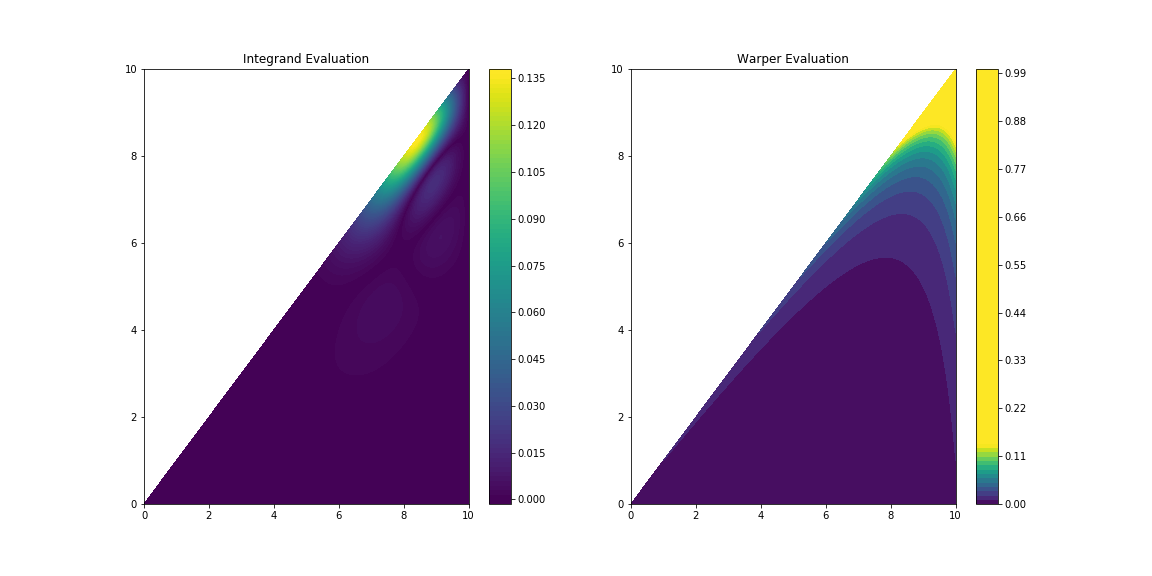

In [16]:
from scipy.interpolate import griddata

x = np.array(u_list)[:,0]
y = np.array(u_list)[:,1]
z = np.abs(g_order2)
zw = np.abs(g_order2_w)


xi = np.linspace(0.0,10.0,500)
yi = np.linspace(0.0,10.0,500)
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
ziw = griddata((x, y), zw, (xi[None,:], yi[:,None]), method='cubic')


fig = plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.contourf(xi,yi,zi, 100,vmin=z.min(), vmax=z.max())
plt.colorbar() # draw colorbar
plt.title("Integrand Evaluation")

plt.subplot(1,2,2)
plt.contourf(xi,yi,ziw, 100,vmin=z.min(), vmax=z.max())
plt.colorbar() # draw colorbar
plt.title("Warper Evaluation")

plt.savefig("integrange_vs_warper.pdf", dpi=600)

plt.show()

In [46]:
# t = np.linspace(0.0,10.0,251)
# t_list = [list([t0, t0]) for t0 in t]

# W_order2_diag = np.array(map(computer.integrand, t_list))

# fig = plt.figure(figsize=(15,5))
# ax0 = plt.subplot(1,1,1)
# ax0.plot(t, W_order2_diag.real, marker='o', markersize=2, linewidth=0.5, color='red')
# ax0.plot(t, W_order2_diag.imag, marker='o', markersize=2, linewidth=0.5, color='orange')
# plt.show()

## SciPy Integral

In [47]:
def lim0():
    return [0, 10.0]

def lim1(t1):
    return [0, t1]

def lim2(t1, t2):
    return [0, t2]

result_1_sp = sp.integrate.nquad(lambda x: computer.integrand([x]).real, [lim0], opts={'limit': 1000}, full_output=True)
result_2_sp = sp.integrate.nquad(lambda x, y: computer.integrand([x, y]).imag, [lim1, lim0], opts={'limit': 1000}, full_output=True)
# result_3_sp = sp.integrate.nquad(lambda x, y, z: my_integrand([x, y, z]).real, [lim2, lim1, lim0], opts={'limit': 50}, full_output=True)


In [48]:
print "Order 1:", result_1_sp
print "Order 2:", result_2_sp

Order 1: (-0.18157328685641913, 2.3575981097923027e-09, {'neval': 63})
Order 2: (1.6315647010411563, 1.4869438519640528e-08, {'neval': 4893})


In [49]:
print result_1 + result_1_sp[0]
print result_2 + result_2_sp[0]

NameError: name 'result_1' is not defined

In [50]:
## Cuba Evaluation

### Cubature Evaulation

In [52]:
from cubature import cubature# S.Johnson package # https://github.com/saullocastro/cubature

In [185]:
#Order 1

def order_1_vectorize(t):
    t_list = [list(t0) for t0 in t]
    out = np.transpose(np.array([map(computer.integrand, t_list)]))
    return np.real(out[:,0])

xmin = [ 0.0]
xmax = [10.0 - 1e-10]
result_1_cub_val, result_1_cub_err = cubature(order_1_vectorize, 1, 1, xmin, xmax, vectorized=True, abserr=1e-10, relerr=1e-10, adaptive='p')
print result_1_cub_val[0], ",", result_1_cub_err[0]

-0.3780374601590787 , 1.0386247417670802e-11


In [186]:
print result_1 + result_1_cub_val[0]

5.5573594670565996e-08


In [ ]:
def my_integrand_order2_scaled(t):
    return t[0] * computer.integrand([t[0], t[0] * t[1]])


def order_2_scalar(t):
    t_list = [list(t0) for t0 in list(t)]
    out = np.imag(t[:, 0] * np.transpose(np.array([map(my_integrand_order2_scaled, t_list)])))
    return out[:,0]
#     return np.imag(t[0] * my_integrand([t[0], t[0] * t[1]]))

xmin = [0.0, 0.0]
xmax = [10.0, 1.0]
result_2_cub_val, result_2_cub_err = cubature(order_2_scalar, 2, 1, xmin, xmax, vectorized=True, abserr=1e-4, relerr=1e-4, adaptive='p')
print result_2_cub_val[0], ",", result_2_cub_err[0]

In [ ]:
print result_2 + result_2_cub_val[0]

In [48]:
def integrand_rectangle(x_array):
    return 1.

def integrand_rectangle_v(x_array):
    return np.ones_like(x_array[:, 0])

def integrand_circle(x_array):
    return x_array[0]

def integrand_circle_v(x_array):
    return x_array[:, 0]

def exact_rectangle(a, b):
    return a*b

def exact_circle(r):
    return math.pi*r**2

# rectangle
print('_________________')
print('')
print('Rectangle')
a, b = 3, 5
xmin = [0, 0]
xmax = [a, b]
val, err = cubature(integrand_rectangle, 2, 1, xmin, xmax)
print('Approximated: {0}'.format(val))
print('Exact: {0}'.format(exact_rectangle(a, b)))
# rectangle (vectorized)
print('_________________')
print('')
print('Rectangle (vectorized)')
a, b = 3, 5
xmin = [0, 0]
xmax = [a, b]
val, err = cubature(integrand_rectangle_v, 2, 1, xmin, xmax, vectorized=True)
print('Approximated: {0}'.format(val))
print('Exact: {0}'.format(exact_rectangle(a, b)))
# circle
print('_________________')
print('')
print('Circle')
r = 3.
xmin = [0, 0]
xmax = [r, 2*math.pi]
val, err = cubature(integrand_circle, 2, 1, xmin, xmax)
print('Approximated: {0}'.format(val))
print('Exact: {0}'.format(exact_circle(r)))
print('_________________')
# circle (vectorized)
print('_________________')
print('')
print('Circle (vectorized)')
r = 3.
xmin = [0, 0]
xmax = [r, 2*math.pi]
val, err = cubature(integrand_circle_v, 2, 1, xmin, xmax, vectorized=True)
print('Approximated: {0}'.format(val))
print('Exact: {0}'.format(exact_circle(r)))
print('_________________')


_________________

Rectangle


NameError: name 'cubature' is not defined

## Factorial vs Power Nr of Operations

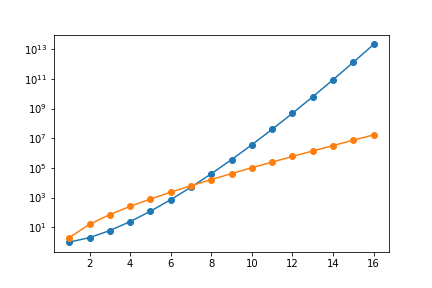

In [17]:
## Figure out exact FLOP scaling

x = np.linspace(1,16,16, dtype=int)
y_fac = map(np.math.factorial, x)#.linspace(1,10,10, dtype=int)
y_det = np.power(2, x) * np.square(x)

plt.plot(x, y_fac, marker='o')
plt.plot(x, y_det,  marker='o')
plt.yscale('log')

In [134]:
1+1

2